# KNN

## Catch up - K-nearest neighbors

The k-nearest neighbors (KNN) algorithm is a powerful yet simple machine learning technique used for both classification and regression tasks. It works by identifying the closest data points (neighbors) to a new data point and basing its prediction on those neighbors.

Advantages:
* It is extremely easy to both understand and to implement. There are only two parameters required, the value of $K$ and the distance function $(L1 / L2 / L^n)$.

<!-- * It is non-parametric model, It does not assume any distribution about the data unlike linear regression. -->

* It is lazy learning algorithm (no prior training  required). This makes the KNN algorithm much faster than other algorithms that require training e.g, SVM, linear regression, neural network, etc.

Disadvantages:
* It does not work well with large dataset, since the cost of calculating the distance between the new point and each of the existing ones is costly.

<!-- * It does not well with high dimensions: With large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. -->
<!--
* Scaling sensitivity: as a distance-based algorithm, all features should be on the same scale to avoid drifting. -->

In this example we show how to construct, train and classify using K-nearest neighbors the Iris classification problem.


## The algorithm (classification)

1.   Choose the value of K - how many nearest neighbours you need to take into account before making a decision. **K should be odd to guarantee the existence of a majority**.

2.   Computing the distance of a query point from all other points in the dataset.

3. Selecting K point with the minimum distance from the query point.

4. Take the majority vote across the query's K nearest neighbour classes.

5. Assign the query point class as the majority class.

![](https://drive.google.com/uc?export=view&id=1In_WYez-00_9TwUQg_OzrvH73hYOkXyc)




## How to choose K?

The only hyper parameters are K and the distance function, to choose K we perform multiple training sessions and plot the accuracy vs k on the test dataset.

We would like to find the K value with the highest test accuracy.

![](https://drive.google.com/uc?export=view&id=1m04K8i8iOTmsYbBHmtLB39RUJwnHNokw)



## Importing libraries

In [25]:
import random
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Random seed
seed = 100
np.random.seed(seed)
random.seed(seed)

##  Data

In [26]:
iris = datasets.load_iris()
data  = pd.DataFrame({'sepal_length': iris.data[:,0],
                   'sepal_width': iris.data[:,1],
                   'petal_length': iris.data[:,2],
                   'petal_width': iris.data[:,3],
                   'type': iris.target})
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
X, Y = iris['data'], iris['target']
from sklearn.model_selection import train_test_split
print(f'X: {X.shape} ; Y: {Y.shape}')

# train
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.15, random_state=100)
X_train, X_val, Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.15, random_state=100)

print(f'X_train: {X_train.shape} ; Y_train: {Y_train.shape} ; X_val: {X_val.shape} ; Y_val: {Y_val.shape} ; X_test: {X_test.shape} ; Y_test: {Y_test.shape}')

X: (150, 4) ; Y: (150,)
X_train: (107, 4) ; Y_train: (107,) ; X_val: (20, 4) ; Y_val: (20,) ; X_test: (23, 4) ; Y_test: (23,)


## KNN implementation

### Helper functions

In [28]:
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

### KNN Class

In [29]:
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
          distances = self.dist_metric(x, self.X_train)
          y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
          neighbors.append(y_sorted[:self.k])

        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy, y_pred

## Choosing the hyperparameter k

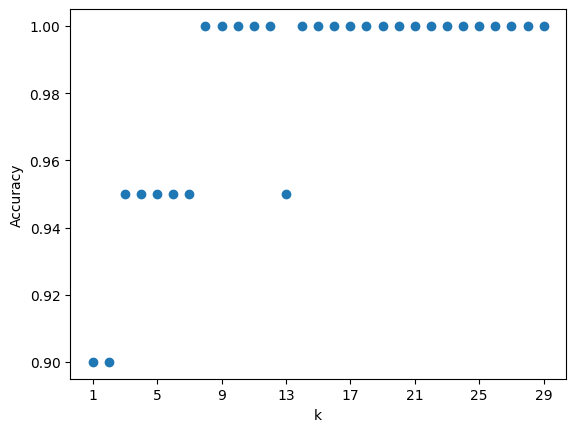

In [30]:
# Test knn model across varying ks
accuracies = []
predictions = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, Y_train)
    accuracy, prediction = knn.evaluate(X_val, Y_val)
    accuracies.append(accuracy)
    predictions.append(prediction)

# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.scatter(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy")
plt.xticks(ks[::4])
plt.show()

In [31]:
K=8
knn = KNeighborsClassifier(k=K)
knn.fit(X_train, Y_train)
accuracy, prediction = knn.evaluate(X_test, Y_test)
print(f'The model testing accuracy is = {accuracy}')

The model testing accuracy is = 1.0


## Visualizing classification over the whole dataspace

Text(0.5, 1.0, 'test')

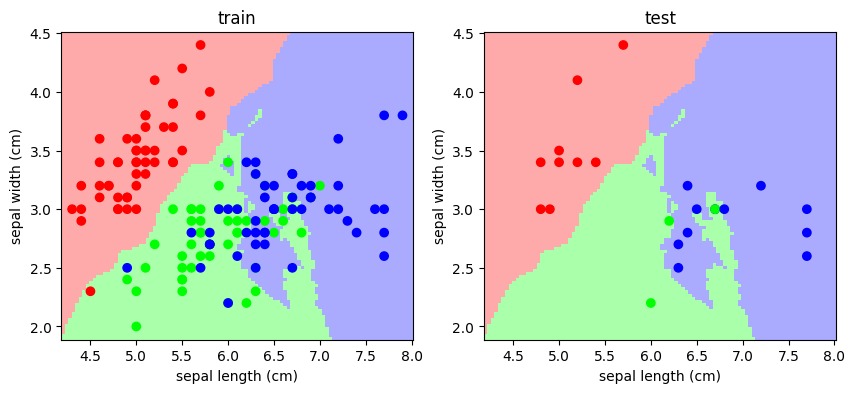

In [32]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

knn = KNeighborsClassifier(k=7)
knn.fit(X, Y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
Z = np.array(knn.predict(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
pl.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

# plot the dataset
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
pl.title('train')

# Put the result into a color plot
plt.subplot(1, 2, 2)
pl.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

# Plot also the training points
pl.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')
pl.title('test')

## Model selection summary

The choice of algorithm in machine learning depends on various factors including the nature of your data, the problem you're trying to solve, the complexity of the dataset, and the interpretability of the model. Here's a general guideline on when to use Linear Regression, Decision Trees, Random Forests, and KNN:

### Linear Regression

**When to Use:**

  Problem Type: Suitable for regression problems (predicting a continuous output).
  Relationship Between Variables: When there's a linear relationship between the independent and dependent variables.
  Interpretability: When you need a model that is easy to interpret and explain.
  Simple and Fast: Ideal for simpler tasks where complex models are unnecessary.

**Limitations:**

  Cannot model complex relationships well.
  Not suitable for classification tasks.

### Decision Trees

**When to Use:**

  Problem Type: Works for both classification and regression tasks.
  Interpretability: Provides clear decision rules, making the model easy to interpret.
  Non-Linear Data: Good at capturing non-linear relationships between variables.
  Feature Importance: Useful when you need to understand the importance of different features in prediction.

**Limitations:**

  Prone to overfitting, especially with complex trees.
  Can be unstable, as small changes in data might lead to a different tree.

### Random Forests

**When to Use:**

  Problem Type: Suitable for both classification and regression.
  Handling Overfitting: Random Forests mitigate the overfitting problem common in Decision Trees.
  Non-Linear Data: Effective for datasets with complex relationships.
  Performance: Often provides a significant improvement in accuracy compared to a single Decision Tree.

**Limitations:**

  Less interpretable compared to a single Decision Tree.
  Can be computationally intensive, especially with a large number of trees.

### K-Nearest Neighbors (KNN)

**When to Use:**

  Problem Type: Can be used for both classification and regression.
  Simple and Effective: Works well with smaller datasets and is easy to understand and implement.
  Non-Parametric: Good choice when the data distribution is unknown.
  Feature Space: Effective in cases where the data points in the feature space are not too sparse.

**Limitations:**

  Suffers in performance with high-dimensional data (curse of dimensionality).
  Computationally intensive with large datasets.
  Sensitive to the scale of the data and irrelevant features.

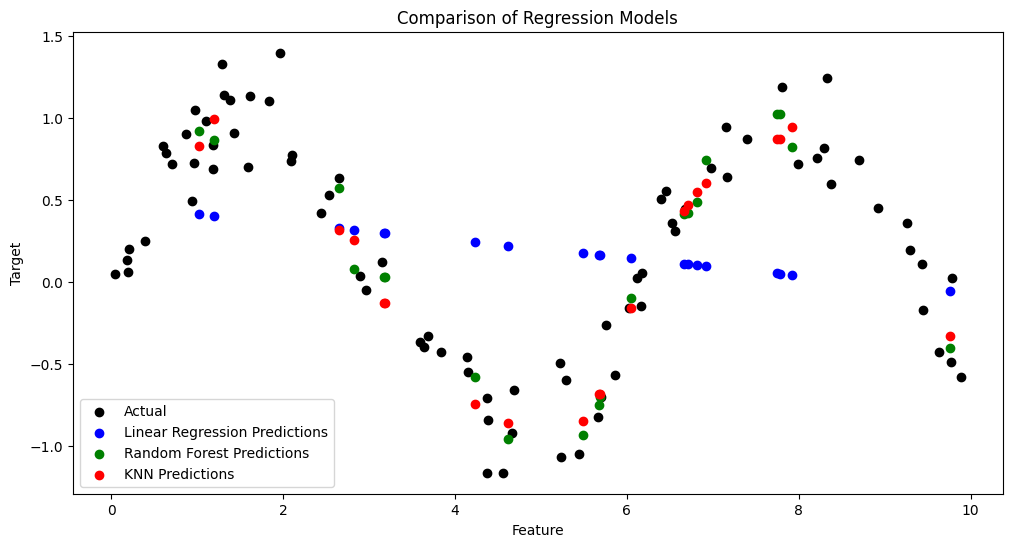

Linear Regression MSE: 0.4794068095181657
Random Forest MSE: 0.048578549693173344
KNN MSE: 0.06079381437250184


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset for a 1D regression problem
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = np.sin(X).squeeze() + np.random.randn(100) * 0.2  # Non-linear relationship with some noise

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))

# Actual data
plt.scatter(X_train, y_train, color='black', label='Actual')
# plt.show()

# Linear Regression predictions
plt.scatter(X_test, y_pred_lr, color='blue', label='Linear Regression Predictions')

# Random Forest predictions
plt.scatter(X_test, y_pred_rf, color='green', label='Random Forest Predictions')

# KNN predictions
plt.scatter(X_test, y_pred_knn, color='red', label='KNN Predictions')

plt.title('Comparison of Regression Models')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Print MSE for each model
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


### Face lower half reconstruction
In this section, we will explore and apply the various algorithms we've studied that are relevant for multi-output estimators, focusing on image completion. Our objective is to accurately predict the lower half of a face based on its upper half. We are using an example inspired by a case study available on the Scikit-learn website, which can be viewed [here](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html). Through this exercise, we'll gain hands-on experience in applying these algorithms to a real-world problem, enhancing our understanding of their functionality and effectiveness in image processing tasks.

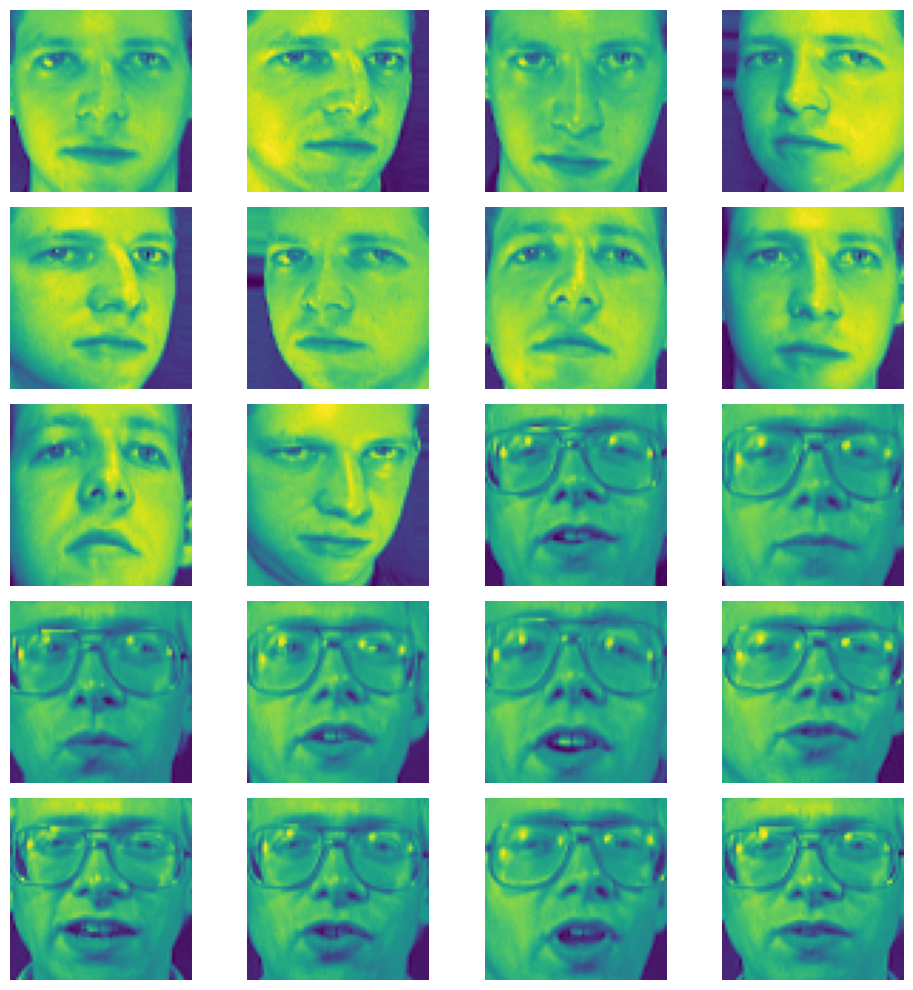

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

def plot_images(image_list, rows=None, cols=None, figsize=(10, 10)):
  """
  Plots a list of images in a grid layout.

  Args:
    image_list: A list of image paths or NumPy arrays.
    rows (optional): Number of rows in the grid layout.
    cols (optional): Number of columns in the grid layout.
    figsize (optional): Size of the figure.

  Returns:
    None
  """
  num_images = len(image_list)
  if rows is None and cols is None:
    rows = int(np.ceil(np.sqrt(num_images)))
    cols = int(np.ceil(num_images / rows))

  fig, axes = plt.subplots(rows, cols, figsize=figsize)

  for i, image in enumerate(image_list):
    ax = axes[i // cols, i % cols]
    ax.imshow(image.reshape((64,64)))
    ax.axis('off')

  plt.tight_layout()
  plt.show()

# Example usage
image_paths = [row for row in data[:20,:]]
plot_images(image_paths)

X_train: (300, 2048) y_train: (300, 2048) X_test: (5, 2048) y_test: (5, 2048)


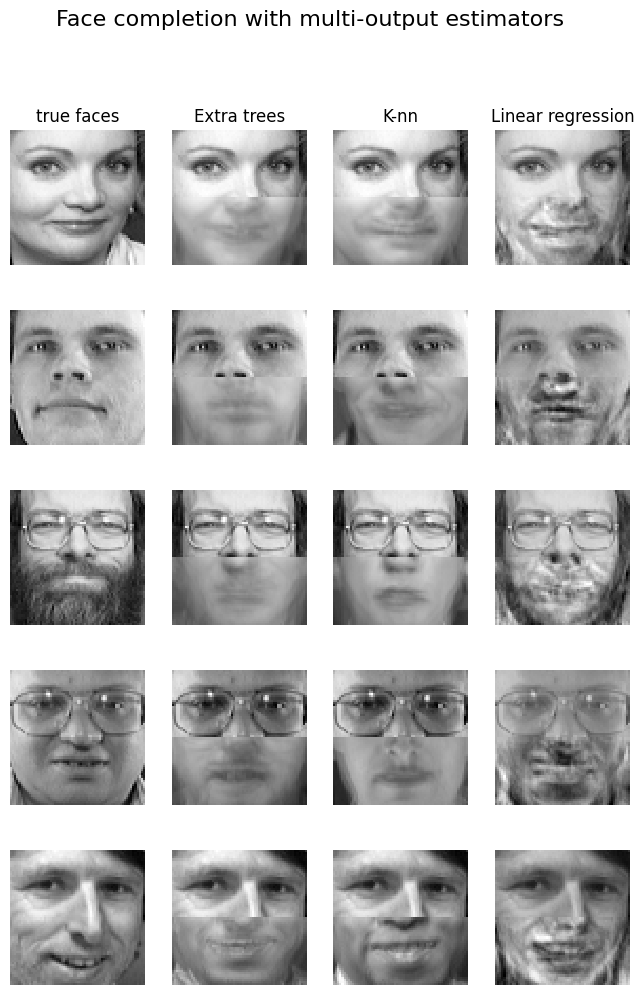

In [35]:
# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]
n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]
print(f'X_train: {X_train.shape} y_train: {y_train.shape} X_test: {X_test.shape} y_test: {y_test.shape}')

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

# Warming up with NN

## Overview of `torch.nn`

When diving into the world of deep learning with PyTorch, one of the most fundamental and powerful components you'll encounter is the torch.nn module. This module is at the heart of PyTorch's neural network (nn) capabilities. It provides the building blocks necessary to create and train your own neural networks.

## Purpose of `torch.nn`

The primary purpose of torch.nn is to abstract away the complexities of creating neural networks from scratch.

## Key Components of `torch.nn`

Layers: `nn.Linear`, `nn.Conv2d`, etc.

Activation Functions: `nn.ReLU`, `nn.Sigmoid`, `nn.LeakyReLU`, `nn.Tanh`, etc.

Loss Functions: `nn.MSELoss`, `nn.CrossEntropyLoss`, etc.

Utilities: torch.nn also provides utilities for weight initialization, normalization, dropout, and more, which are essential for building and training stable and effective neural networks.


In [36]:
import torch, torchvision
import torch.nn as nn

### Perceptron: A Generalization of Linear and Logistic Regression in PyTorch

Linear regression predicts an output $y$ based on a linear combination of input features $x=[x1,x2,...,xn]$ and their weights $w=[w1,w2,...,wn]$, added to a bias $b$:

$
y=w⋅x+b
$

Logistic regression, used for binary classification, applies a sigmoid function σσ to the linear combination of inputs and weights:

$
y=σ(w⋅x+b)
$

A perceptron applies an activation function $f$ to the linear combination of inputs and weights:

$y=f(w⋅x+b)$

The form of the activation function ff dictates the behavior of the perceptron

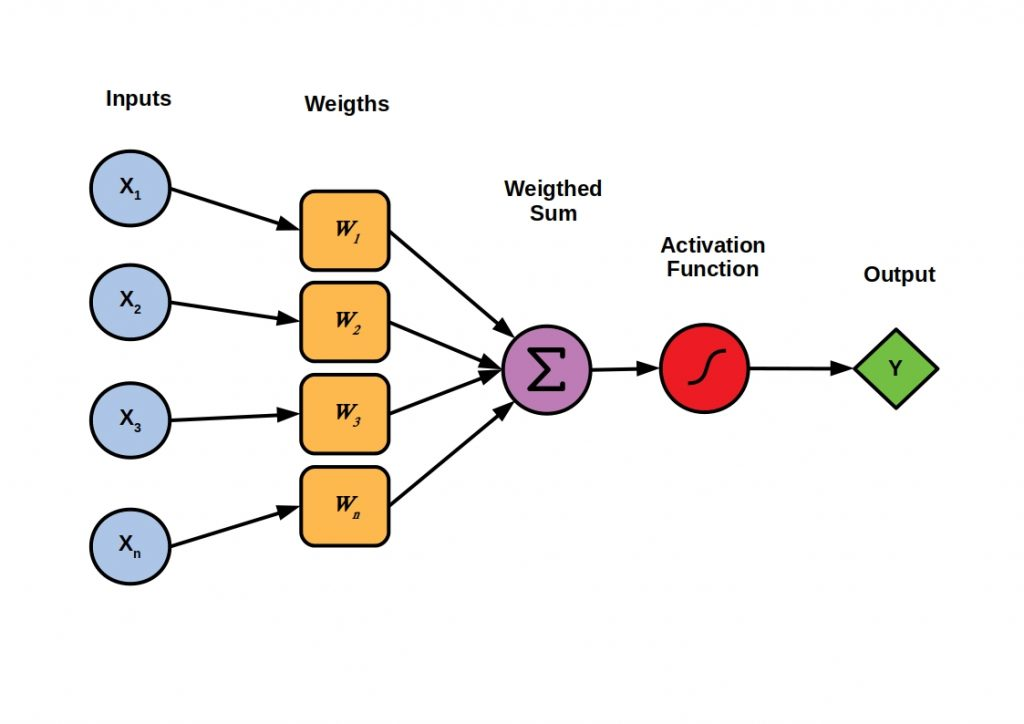

In [37]:
input_size = 10
x = torch.from_numpy(np.random.rand(1,input_size)).float()

# linear regression model
model = nn.Linear(input_size, 1)
pred = model(x)
print(f'x shape: {pred.shape} x={pred.item():.4f}')

# logistic regression model
seq_model = nn.Sequential(nn.Linear(input_size, 1),nn.Sigmoid())
pred = seq_model(x)
print(f'x shape: {pred.shape} x={pred.item():.4f}')

x shape: torch.Size([1, 1]) x=-0.0550
x shape: torch.Size([1, 1]) x=0.5691


In [38]:
# Perceptron as Linear Regression
class LinearPerceptron(nn.Module):
    def __init__(self, input_size):
        super(LinearPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)  # Linear activation function

# Perceptron as Logistic Regression
class LogisticPerceptron(nn.Module):
    def __init__(self, input_size):
        super(LogisticPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation function

In [39]:
# linear regression model
model = LinearPerceptron(input_size).float()
pred = model(x)
print(f'x shape: {pred.shape} x={pred.item():.4f}')

# logistic regression model
model = LogisticPerceptron(input_size).float()
pred = model(x)
print(f'x shape: {pred.shape} x={pred.item():.4f}')

x shape: torch.Size([1, 1]) x=0.2023
x shape: torch.Size([1, 1]) x=0.3944


### Initializing Weights of a Linear Layer

In [40]:
import torch.nn.init as init
# Function to initialize weights
def init_weights(m, init_type='normal'):
    if isinstance(m, nn.Linear):
        if init_type == 'uniform':
            init.uniform_(m.weight, mean=0.0, std=0.5)
            init.constant_(m.bias, 0)
        elif init_type == 'normal':
            init.normal_(m.weight)
            init.constant_(m.bias, 0)
        elif init_type == 'ones':
            init.ones_(m.weight)
            init.constant_(m.bias, 0)
        elif init_type == 'zeros':
            init.zeros_(m.weight)
            init.constant_(m.bias, 0)
        elif init_type == 'ones':
            init.ones_(m.weight)
            init.constant_(m.bias, 0)

print(f'model weights {model.linear.weight.detach().numpy()}')

# initlize with model class
init_type = 'ones'  # Define the initialization type here
model.apply(lambda m: init_weights(m, init_type))
print(f'model weights {model.linear.weight.detach().numpy()}')

# initlize with sqeuential model
seq_model.apply(lambda m: init_weights(m, init_type))
print(f'model weights {seq_model[0].weight.detach().numpy()}')

model weights [[-0.07605827 -0.24931479 -0.06392661 -0.251203   -0.02776858 -0.09532924
   0.17126068  0.2178227   0.06965807 -0.2590211 ]]
model weights [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
model weights [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Activation Functions in `torch.nn` and Their Visualization

In this section of your Colab notebook, you'll explore different activation functions available in PyTorch's torch.nn module and visualize them to understand their behavior. Activation functions are crucial in neural networks as they introduce non-linear properties to the model, allowing it to learn more complex patterns.

1. ReLU (Rectified Linear Unit)

Simple, fast, reduces likelihood of vanishing gradient problem.

Common default, especially in hidden layers of deep networks.

2. Sigmoid

Maps output to a probability range (0, 1).

Often used in binary classification problems in the output layer.

3. Tanh (Hyperbolic Tangent)

Zero-centered (making training easier), outputs values between -1 and 1.

Useful when data is zero-centered; less common in deep networks.

4. Leaky ReLU

Addresses dying ReLU problem by allowing small gradients for negative inputs.

Alternative to ReLU, particularly in scenarios where dying ReLU is a concern.

In [41]:
out = nn.Linear(10,1)(x)

x shape - torch.Size([100]) ; y shape - torch.Size([100])


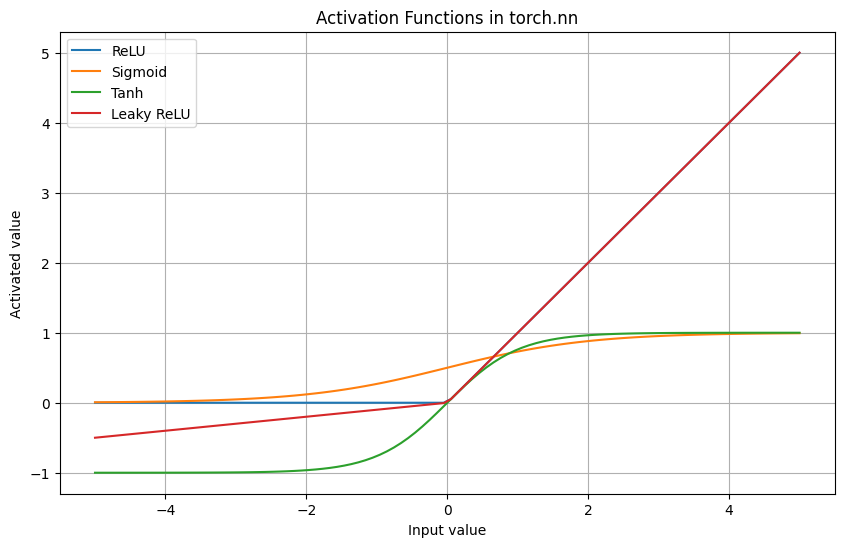

In [42]:
# Activation functions
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "Leaky ReLU": nn.LeakyReLU(0.1),
}

# Generate input data
x = torch.linspace(-5, 5, 100)

# Plot each activation function
plt.figure(figsize=(10, 6))
for name, activation in activations.items():
    # Apply activation function to input data
    y = activation(x)

    plt.plot(x.numpy(), y.detach().numpy(), label=name)

print(f'x shape - {x.shape} ; y shape - {y.shape}')
plt.title("Activation Functions in torch.nn")
plt.xlabel("Input value")
plt.ylabel("Activated value")
plt.legend()
plt.grid(True)
plt.show()